In [6]:
import torch

from utils.audio_utils import load_waveform, divide_waveform, waveform_to_spectrogram, \
    spectrogram_to_waveform, compile_waveform, save_waveform
from utils.plot_utils import show_spectrogram, show_waveform

In [7]:
model_path = "../_models/speech_denoiser_model.pth"
model = torch.load(model_path, map_location='cpu')

In [8]:
model.eval()

waveform, rate = load_waveform('target/source_sample.wav')

chunks = divide_waveform(waveform)
spectrograms = waveform_to_spectrogram(chunks)
denoised_spectrograms = model(spectrograms)
denoised_waveforms = spectrogram_to_waveform(denoised_spectrograms)
denoised_waveform = compile_waveform(denoised_waveforms)

save_waveform(denoised_waveform, 'test_sample.wav')

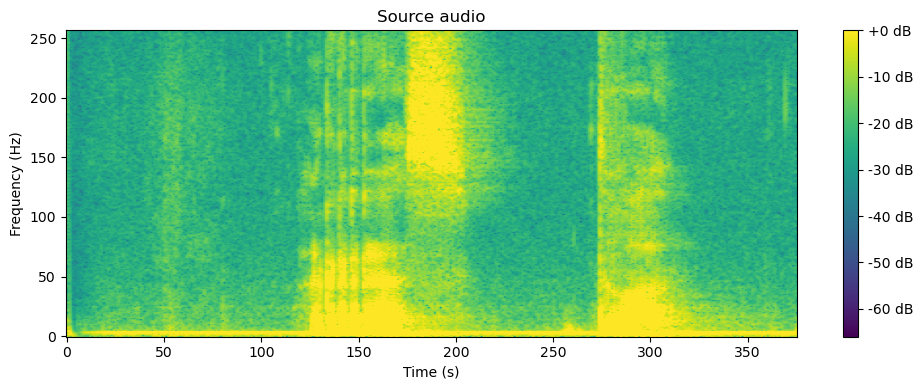

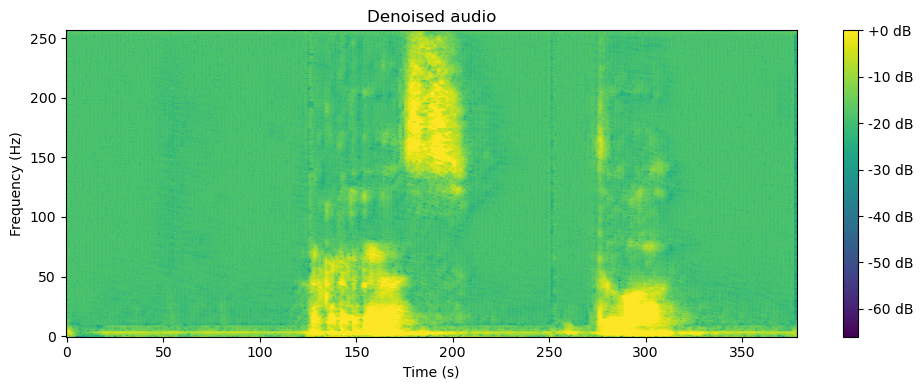

In [9]:
show_spectrogram(waveform, "Source audio")
show_spectrogram(denoised_waveform, "Denoised audio")

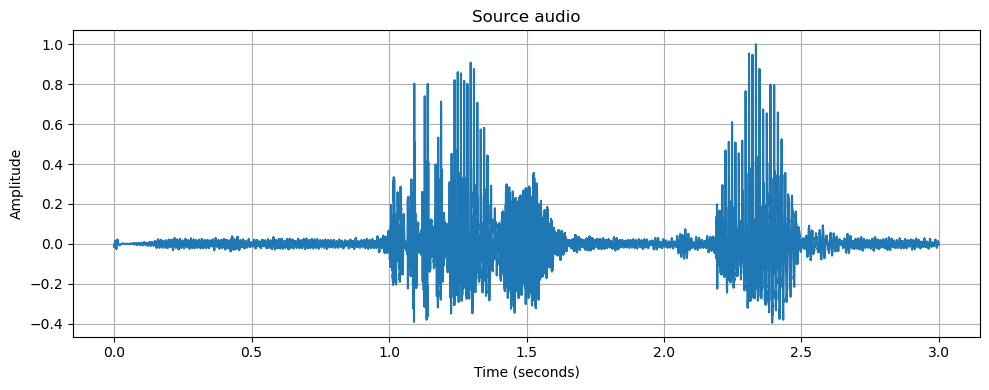

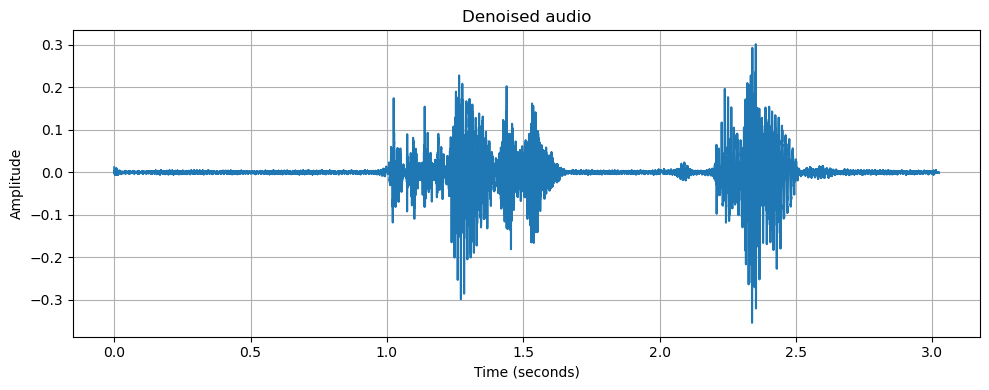

In [10]:
show_waveform(waveform, "Source audio")
show_waveform(denoised_waveform, "Denoised audio")